<a href="https://colab.research.google.com/github/zaeyonz/Fruits_Classification/blob/main/Fruits_Classification(K-means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***K-means (k-평균)***
1. 무작위로 k개의 클러스터 중심을 정함
2. 각 샘플에서 가장 가까운 중심을 찾아 해당 클러스터의 샘플로 지정
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경함
4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복
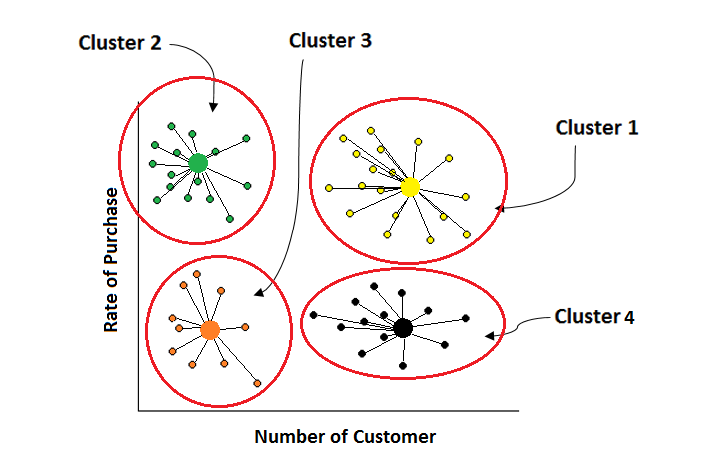

In [1]:
# wget 명령으로 데이터 다운로드

!wget http://bit.ly/fruits_300_data -O fruits_300.npy

--2023-08-02 14:11:56--  http://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-08-02 14:11:56--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-08-02 14:11:57--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connect

In [12]:
# numpy 배열 준비

import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)     # (샘플 개수, 너비, 높이) 크기의 3차원 배열 ---> (샘플 개수, 너비X높이) 크기의 2차원 배열로 변경

In [13]:
# k-means 알고리즘
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)      # n_clusters 매개변수는 클러스터 개수를 지정함
km.fit(fruits_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [14]:
# 군집된 결과는 KMeans 클래스 객체의 labels_ 속성에 저장됨

print(km.labels_)           # n_clusters=3 으로 했기 때문에 0,1,2의 값이 나옴

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [11]:
# 레이블 0,1,2 로 모은 샘플 개수 확인

print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


- 첫 번째 클러스터(레이블 0)가 111개의 샘플을 모음
- 두 번째 클러스터(레이블 1)가 98개의 샘플을 모음
- 세 번째 클러스터(레이블 2)가 91개의 샘플을 모음
---
***각 클러스터가 어떤 이미지를 나타냈는지 그림으로 출력하기 위해 유틸리티 함수 drsw_fruits() 만들기***

In [15]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수
    # 한 줄에 10개씩 이미지를 그림. 샘플 개수를 10으로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열의 개수는 샘플 개수임. 그렇지 않으면 10개임
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 +j < n:     # n개 까지만 그림
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

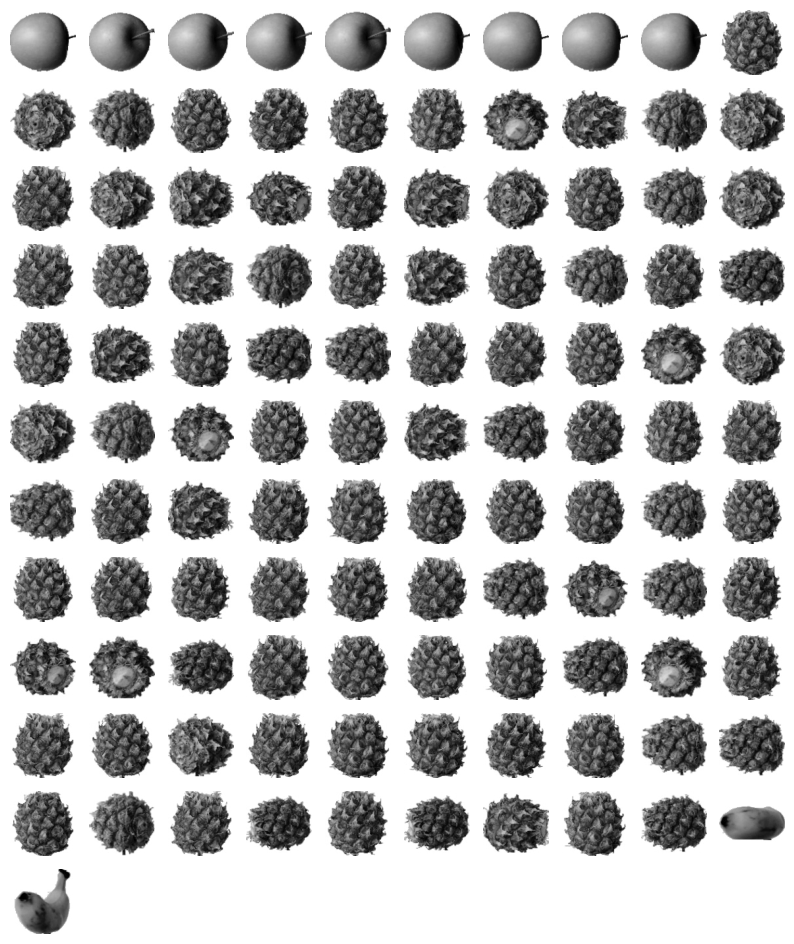

In [16]:
draw_fruits(fruits[km.labels_==0])